In [287]:
import os
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [347]:
df_test = pd.read_csv("EdStats_CSV\EdStatsData.csv")

In [348]:
df_test['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [3]:
df_data.shape, df_data.columns

((886930, 70),
 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
        '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
        '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
        '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
        '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
        '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
        '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
        '2095', '2100', 'Unnamed: 69'],
       dtype='object'))

In [346]:
df_data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [217]:
df_data.drop(columns=[ '2035', '2040', '2045',
        '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
        '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)
df_data.shape

(886930, 55)

In [218]:
lst_regions =['EAS', 'ECS', 'IND', 'LCN', 'MEA', 'SAS', 'SSF']
df_data_regions = df_data[df_data['Country Code'].isin(lst_regions)]
df_data_regions.shape

(25655, 55)

In [224]:
lst_metrics = ['SE.PRE.ENRR', 
'SE.PRM.ENRR', 
'SE.PRM.NENR', 
'UIS.XGDP.0.FSGOV', 
'UIS.XGDP.1.FSGOV', 
'UIS.XGDP.23.FSGOV', 
'UIS.XGDP.56.FSGOV', 
'SE.PRE.ENRL.TC.ZS', 
'SE.PRM.ENRL.TC.ZS', 
'SE.SEC.ENRL.TC.ZS', 
'SE.PRM.REPT.ZS', 
'SE.PRM.PRSL.ZS', 
'SE.ADT.1524.LT.ZS', 
'SE.ADT.LITR.ZS', 
'SE.ADT.1524.LT.FM.ZS',
'NY.GDP.MKTP.CD', 
'NY.GDP.PCAP.CD',
'NY.GNP.MKTP.CD',
'SP.POP.GROW']
df_data_regions_metrics = df_data_regions[df_data_regions['Indicator Code'].isin(lst_metrics)]
df_data_regions_metrics.to_csv("EdStats_filtered_data_metrics.csv",index=False)

In [219]:
df_data_regions['Country Code'].value_counts()

EAS    3665
ECS    3665
LCN    3665
MEA    3665
SAS    3665
SSF    3665
IND    3665
Name: Country Code, dtype: int64

In [220]:
df_data_regions.to_csv("EdStats_filtered_data.csv",index=False)

In [5]:
rel_cols = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
        '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
        '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
        '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
        '2015', '2016', '2017', '2020']

In [8]:
indxs = df_data.index[df_data[rel_cols].isna().sum(axis=1) < len(rel_cols)/2]
df_data_filt = df_data.loc[indxs]
df_data_filt.shape

(70769, 53)

In [9]:
df_data_filt.rename(columns={'Country Name':'country_name','Country Code':'country_code','Indicator Name': 'indicator_name','Indicator Code':'indicator_code'}, inplace=True)

In [10]:
lst_cols_to_melt = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
        '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
        '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
        '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
        '2015', '2016', '2017', '2020']
df_data_melt = pd.melt(df_data_filt, id_vars=['country_name','country_code', 'indicator_name', 'indicator_code'], 
        value_vars=lst_cols_to_melt)
df_data_melt.shape

(3467681, 6)

In [12]:
df_series = pd.read_csv("EdStats_CSV\EdStatsSeries.csv")
df_series.shape, df_series.columns

((3665, 21),
 Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
        'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
        'Other notes', 'Aggregation method', 'Limitations and exceptions',
        'Notes from original source', 'General comments', 'Source',
        'Statistical concept and methodology', 'Development relevance',
        'Related source links', 'Other web links', 'Related indicators',
        'License Type', 'Unnamed: 20'],
       dtype='object'))

In [22]:
df_data_merged = pd.merge(df_data_melt, df_series[['Series Code', 'Topic']], left_on='indicator_code', right_on='Series Code')
df_data_merged.shape

(3412605, 8)

In [24]:
df_data_merged.head()

,country_name,country_code,indicator_name,indicator_code,variable,value,Series Code,Topic
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,54.822121,SE.PRM.TENR,Primary
1,East Asia & Pacific,EAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,NaN,SE.PRM.TENR,Primary
2,East Asia & Pacific (excluding high income),EAP,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,NaN,SE.PRM.TENR,Primary
3,Euro area,EMU,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,95.223793,SE.PRM.TENR,Primary
4,Europe & Central Asia,ECS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1970,NaN,SE.PRM.TENR,Primary


In [29]:
df_country = pd.read_csv("EdStats_CSV\EdStatsCountry.csv", usecols=['Country Code', 'Region', 'Income Group'])
df_country.shape, df_country.columns

((241, 3), Index(['Country Code', 'Region', 'Income Group'], dtype='object'))

In [31]:
df_data_merged = pd.merge(df_data_merged, df_country, left_on='country_code', right_on='Country Code')
df_data_merged.shape, df_data_merged.columns

((3411380, 11),
 Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
        'variable', 'value', 'Series Code', 'Topic', 'Country Code', 'Region',
        'Income Group'],
       dtype='object'))

In [36]:
df_data_merged['variable'] = df_data_merged['variable'].astype(int)

In [39]:
df_data_merged.rename(columns={'variable':'year'},inplace=True)

In [63]:
series_codes = ['BAR.NOED.1519.FE.ZS',
'BAR.NOED.1519.ZS',
'BAR.PRM.CMPT.1519.FE.ZS',
'BAR.PRM.CMPT.1519.ZS',
'BAR.SEC.CMPT.1519.FE.ZS',
'BAR.SEC.CMPT.1519.ZS',
'BAR.TER.CMPT.1519.FE.ZS',
'BAR.TER.CMPT.1519.ZS',
'IT.CMP.PCMP.P2',
'IT.NET.USER.P2',
'LO.EGRA.LSTN.0.ENG.3GRD',
'LO.EGRA.READ.0.ENG.3GRD',
'LO.EGRA.READ.ENG.ADV.3GRD',
'LO.TIMSS.MAT4.BL',
'NY.GDP.MKTP.CD',
'NY.GDP.PCAP.CD',
'NY.GNP.MKTP.CD',
'SE.PRE.ENRL.FE.ZS',
'SE.PRE.ENRL.TC.ZS',
'SE.PRE.NENR',
'SE.PRE.NENR.FE',
'SE.PRM.DROP.ZS',
'SE.PRM.ENRL.TC.ZS',
'SE.PRM.NENR',
'SE.PRM.NENR.FE',
'SE.PRM.NENR.MA',
'SE.SEC.ENRL.TC.ZS',
'SE.SEC.NENR',
'SE.SEC.NENR.FE',
'SE.XPD.TOTL.GD.ZS',
'SH.DYN.MORT',
'SL.TLF.BASC.FE.ZS',
'SL.TLF.BASC.ZS',
'SL.UEM.NEET.ZS',
'SP.POP.GROW',
'UIS.AIR.1.Glast.GPI',
'UIS.FEP.0',
'UIS.GER.4',
'UIS.NAR.1',
'UIS.NAR.1.F',
'UIS.PTRHC.1.TRAINED',
'UIS.REPR.1',
'UIS.XGDP.0.FSGOV',
'UIS.XGDP.1.FSGOV',
'UIS.XGDP.23.FSGOV',
'UIS.XGDP.56.FSGOV'
]
len(ftrs)

46

In [65]:
df_data_sel_inds = df_data_merged[df_data_merged['Series Code'].isin(series_codes)]
df_data_sel_inds.shape

(90307, 11)

In [68]:
df_data_sel_inds.columns

Index(['country_name', 'country_code', 'indicator_name', 'indicator_code',
       'year', 'value', 'Series Code', 'Topic', 'Country Code', 'Region',
       'Income Group'],
      dtype='object')

In [70]:
df_india = df_data_sel_inds[df_data_sel_inds['country_name']=='India']

In [71]:
df_india['value'].isna().sum()

43

In [76]:
df_india[['Series Code', 'indicator_name', 'indicator_code']].drop_duplicates()

,Series Code,indicator_name,indicator_code
2296679,NY.GDP.MKTP.CD,GDP at market prices (current US$),NY.GDP.MKTP.CD
2296777,NY.GDP.PCAP.CD,GDP per capita (current US$),NY.GDP.PCAP.CD
2296826,NY.GNP.MKTP.CD,GNI (current US$),NY.GNP.MKTP.CD
2297904,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000)",SH.DYN.MORT
2298149,SE.PRE.ENRL.FE.ZS,Percentage of students in pre-primary educatio...,SE.PRE.ENRL.FE.ZS
2298541,SP.POP.GROW,Population growth (annual %),SP.POP.GROW
2301726,IT.NET.USER.P2,Internet users (per 100 people),IT.NET.USER.P2


In [73]:
life_cycle_codes = ['SE.PRE.NENR', 'SE.PRM.NENR', 'UIS.NAR.1', 'SE.SEC.NENR', 'UIS.GER.4']
df_india[df_india['Series Code'].isin(life_cycle_codes)]

,country_name,country_code,indicator_name,indicator_code,year,value,Series Code,Topic,Country Code,Region,Income Group


In [81]:
df_data_sel_inds.groupby(['country_name'])['country_code'].count().sort_values(ascending=False)

country_name
Latin America & Caribbean (excluding high income)    735
Latin America & Caribbean                            735
Middle income                                        686
Euro area                                            686
World                                                686
                                                    ... 
Turks and Caicos Islands                              49
Channel Islands                                       49
Isle of Man                                           49
American Samoa                                        49
St. Martin (French part)                              49
Name: country_code, Length: 238, dtype: int64

In [88]:
df_data_sel_inds[df_data_sel_inds['country_name'] == 'North America']

,country_name,country_code,indicator_name,indicator_code,year,value,Series Code,Topic,Country Code,Region,Income Group
177037,North America,NAC,GDP at market prices (current US$),NY.GDP.MKTP.CD,1970,1.163966e+12,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,NAC,NaN,NaN
177038,North America,NAC,GDP at market prices (current US$),NY.GDP.MKTP.CD,1971,1.267253e+12,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,NAC,NaN,NaN
177039,North America,NAC,GDP at market prices (current US$),NY.GDP.MKTP.CD,1972,1.395767e+12,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,NAC,NaN,NaN
177040,North America,NAC,GDP at market prices (current US$),NY.GDP.MKTP.CD,1973,1.560140e+12,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,NAC,NaN,NaN
177041,North America,NAC,GDP at market prices (current US$),NY.GDP.MKTP.CD,1974,1.709546e+12,NY.GDP.MKTP.CD,Economic Policy & Debt: National accounts: US$...,NAC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
183990,North America,NAC,Labor force with basic education (% of total),SL.TLF.BASC.ZS,2014,4.508928e+01,SL.TLF.BASC.ZS,Social Protection & Labor: Labor force structure,NAC,NaN,NaN
183991,North America,NAC,Labor force with basic education (% of total),SL.TLF.BASC.ZS,2015,4.543373e+01,SL.TLF.BASC.ZS,Social Protection & Labor: Labor force structure,NAC,NaN,NaN
183992,North America,NAC,Labor force with basic education (% of total),SL.TLF.BASC.ZS,2016,NaN,SL.TLF.BASC.ZS,Social Protection & Labor: Labor force structure,NAC,NaN,NaN
183993,North America,NAC,Labor force with basic education (% of total),SL.TLF.BASC.ZS,2017,NaN,SL.TLF.BASC.ZS,Social Protection & Labor: Labor force structure,NAC,NaN,NaN


In [107]:
selected_regions = ['South Asia','Sub-Saharan Africa','Middle East & North Africa','Latin America & Caribbean',
                    'East Asia & Pacific', 'North America','Europe & Central Asia']

In [108]:
df_data_sel_inds_reg = df_data_sel_inds[df_data_sel_inds['country_name'].isin(selected_regions)]

In [109]:
df_data_sel_inds_reg.shape

(4459, 11)

In [177]:
#.groupby(['year']).country_code.count()
df_data_sel_inds_reg[(df_data_sel_inds_reg['indicator_code']=='UIS.XGDP.56.FSGOV')].groupby('year')['country_name'].count()

Series([], Name: country_name, dtype: int64)

In [164]:
df_data_sel_inds_reg[(df_data_sel_inds_reg['indicator_code']=='SL.TLF.BASC.ZS') & (df_data_sel_inds_reg['year']==2020)]['country_name'].unique()

array(['North America'], dtype=object)

In [106]:
df_data_sel_inds_reg[df_data_sel_inds_reg['country_name']=='Latin America & Caribbean ']

,country_name,country_code,indicator_name,indicator_code,year,value,Series Code,Topic,Country Code,Region,Income Group


In [181]:
sel_codes_11 = ['NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'NY.GNP.MKTP.CD', 'SE.PRE.ENRL.FE.ZS', 
                'SE.PRE.ENRL.TC.ZS', 'SE.PRM.DROP.ZS', 'SE.PRM.ENRL.TC.ZS', 'SE.PRM.NENR', 'SE.SEC.ENRL.TC.ZS', 
                'SH.DYN.MORT', 'SP.POP.GROW']
df_data_sel_inds_reg = df_data_sel_inds_reg[df_data_sel_inds_reg['indicator_code'].isin(sel_codes_11)]

In [183]:
df_data_sel_inds_reg.head()

,country_name,country_code,indicator_name,indicator_code,year,value,Series Code,Topic,Country Code,Region,Income Group
10535,East Asia & Pacific,EAS,Cumulative drop-out rate to the last grade of ...,SE.PRM.DROP.ZS,1970,NaN,SE.PRM.DROP.ZS,Primary,EAS,NaN,NaN
10536,East Asia & Pacific,EAS,Cumulative drop-out rate to the last grade of ...,SE.PRM.DROP.ZS,1971,NaN,SE.PRM.DROP.ZS,Primary,EAS,NaN,NaN
10537,East Asia & Pacific,EAS,Cumulative drop-out rate to the last grade of ...,SE.PRM.DROP.ZS,1972,NaN,SE.PRM.DROP.ZS,Primary,EAS,NaN,NaN
10538,East Asia & Pacific,EAS,Cumulative drop-out rate to the last grade of ...,SE.PRM.DROP.ZS,1973,NaN,SE.PRM.DROP.ZS,Primary,EAS,NaN,NaN
10539,East Asia & Pacific,EAS,Cumulative drop-out rate to the last grade of ...,SE.PRM.DROP.ZS,1974,NaN,SE.PRM.DROP.ZS,Primary,EAS,NaN,NaN


In [189]:
df_unmelt = df_data_sel_inds_reg[['country_name', 'year', 'indicator_code', 'value']].pivot(index=['country_name', 'year'], columns='indicator_code').reset_index()

In [191]:
df_unmelt.head()

country_name  year          value                 \
indicator_code                            NY.GDP.MKTP.CD NY.GDP.PCAP.CD   
0               East Asia & Pacific  1970   4.074823e+11     316.225712   
1               East Asia & Pacific  1971   4.521554e+11     341.976701   
2               East Asia & Pacific  1972   5.611249e+11     414.419302   
3               East Asia & Pacific  1973   7.396770e+11     534.343604   
4               East Asia & Pacific  1974   8.521546e+11     602.491430   

                                                                   \
indicator_code NY.GNP.MKTP.CD SE.PRE.ENRL.FE.ZS SE.PRE.ENRL.TC.ZS   
0                4.033822e+11               NaN               NaN   
1                4.483834e+11               NaN               NaN   
2                5.570114e+11               NaN               NaN   
3                7.342022e+11               NaN         25.508051   
4                8.429136e+11               NaN         25.704281   

                                                                               \
indicator_code SE.PRM.DROP.ZS SE.PRM.ENRL.TC.ZS SE.PRM.NENR SE.SEC.ENRL.TC.ZS   
0                         NaN         29.712049         NaN         20.265060   
1                         NaN         29.889179         NaN         21.076191   
2                         NaN         28.558670         NaN         21.643829   
3                         NaN         29.279730         NaN         20.853649   
4                         NaN         29.438480         NaN         20.249470   

                                        
indicator_code SH.DYN.MORT SP.POP.GROW  
0                      NaN    2.596915  
1                      NaN    2.607611  
2                      NaN    2.406704  
3                      NaN    2.235552  
4                      NaN    2.175313

In [195]:
df_unmelt.columns = ['country_name', 'year', 'GDP', 'GDP-per-capita', 'GNI', 'Pre-prim-enrol-fem', 
                     'Pre-prim-Pupil-tr-ratio', 'Prim-drop-out-rate', 'Prim-Pupil-tr-ratio', 'Prim-enrol-net', 'Sec-Pupil-tr-ratio', 
                     'Mortality_rate_under_5', 'Annual_popln_growth']

C:\Users\shara\AppData\Local\Temp\ipykernel_17088\1292095059.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  corr = df_unmelt.drop(['country_name', 'year'], 1).corr()


<AxesSubplot: >

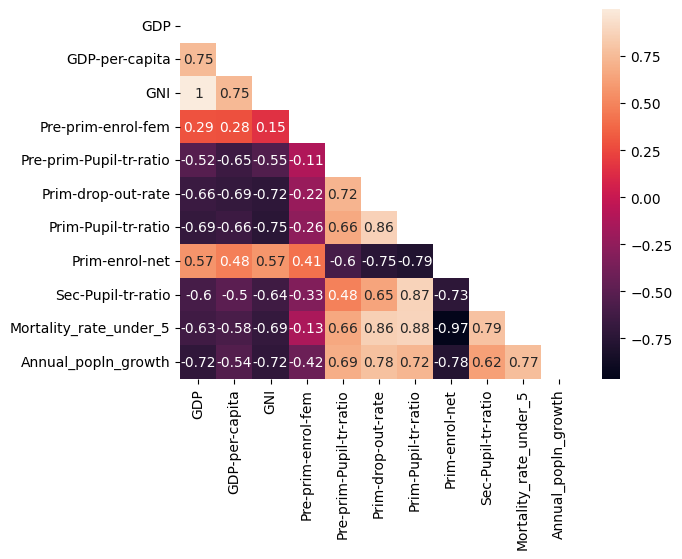

In [196]:
corr = df_unmelt.drop(['country_name', 'year'], 1).corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)

In [209]:
df_unmelt[['Pre-prim-Pupil-tr-ratio', 'Prim-Pupil-tr-ratio', 'Sec-Pupil-tr-ratio', 'country_name', 'year']]

,Pre-prim-Pupil-tr-ratio,Prim-Pupil-tr-ratio,Sec-Pupil-tr-ratio,country_name,year
0,NaN,29.712049,20.265060,East Asia & Pacific,1970
1,NaN,29.889179,21.076191,East Asia & Pacific,1971
2,NaN,28.558670,21.643829,East Asia & Pacific,1972
3,25.508051,29.279730,20.853649,East Asia & Pacific,1973
4,25.704281,29.438480,20.249470,East Asia & Pacific,1974
...,...,...,...,...,...
338,29.726870,41.669819,25.015169,Sub-Saharan Africa,2014
339,NaN,NaN,NaN,Sub-Saharan Africa,2015
340,NaN,NaN,NaN,Sub-Saharan Africa,2016
341,NaN,NaN,NaN,Sub-Saharan Africa,2017


<AxesSubplot: xlabel='indicator_code', ylabel='value'>

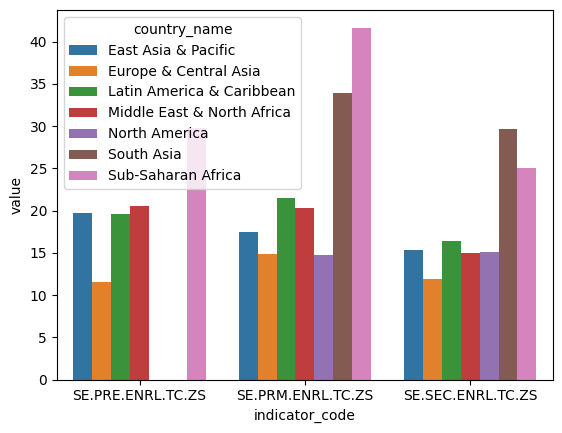

In [211]:
ptr_codes = ['SE.PRE.ENRL.TC.ZS', 'SE.PRM.ENRL.TC.ZS', 'SE.SEC.ENRL.TC.ZS']
sns.barplot(data=df_data_sel_inds_reg[(df_data_sel_inds_reg['year'] == 2014) & (df_data_sel_inds_reg['indicator_code'].isin(ptr_codes))],x='indicator_code', y='value', hue='country_name')

In [206]:
df_data_sel_inds_reg[(df_data_sel_inds_reg['year'] == 2020) & (df_data_sel_inds_reg['indicator_code'].isin(ptr_codes))]

,country_name,country_code,indicator_name,indicator_code,year,value,Series Code,Topic,Country Code,Region,Income Group
16806,East Asia & Pacific,EAS,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2020,NaN,SE.PRE.ENRL.TC.ZS,Teachers,EAS,NaN,NaN
16855,East Asia & Pacific,EAS,Pupil-teacher ratio in primary education (head...,SE.PRM.ENRL.TC.ZS,2020,NaN,SE.PRM.ENRL.TC.ZS,Teachers,EAS,NaN,NaN
16904,East Asia & Pacific,EAS,Pupil-teacher ratio in secondary education (he...,SE.SEC.ENRL.TC.ZS,2020,NaN,SE.SEC.ENRL.TC.ZS,Teachers,EAS,NaN,NaN
45569,Europe & Central Asia,ECS,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2020,NaN,SE.PRE.ENRL.TC.ZS,Teachers,ECS,NaN,NaN
45618,Europe & Central Asia,ECS,Pupil-teacher ratio in primary education (head...,SE.PRM.ENRL.TC.ZS,2020,NaN,SE.PRM.ENRL.TC.ZS,Teachers,ECS,NaN,NaN
45667,Europe & Central Asia,ECS,Pupil-teacher ratio in secondary education (he...,SE.SEC.ENRL.TC.ZS,2020,NaN,SE.SEC.ENRL.TC.ZS,Teachers,ECS,NaN,NaN
86974,Latin America & Caribbean,LCN,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2020,NaN,SE.PRE.ENRL.TC.ZS,Teachers,LCN,NaN,NaN
87023,Latin America & Caribbean,LCN,Pupil-teacher ratio in primary education (head...,SE.PRM.ENRL.TC.ZS,2020,NaN,SE.PRM.ENRL.TC.ZS,Teachers,LCN,NaN,NaN
87072,Latin America & Caribbean,LCN,Pupil-teacher ratio in secondary education (he...,SE.SEC.ENRL.TC.ZS,2020,NaN,SE.SEC.ENRL.TC.ZS,Teachers,LCN,NaN,NaN
151458,Middle East & North Africa,MEA,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2020,NaN,SE.PRE.ENRL.TC.ZS,Teachers,MEA,NaN,NaN


In [205]:
df_data_sel_inds_reg[(df_data_sel_inds_reg['year'] == 2017) & (df_data_sel_inds_reg['indicator_code'].isin(ptr_codes))]

,country_name,country_code,indicator_name,indicator_code,year,value,Series Code,Topic,Country Code,Region,Income Group
16805,East Asia & Pacific,EAS,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2017,NaN,SE.PRE.ENRL.TC.ZS,Teachers,EAS,NaN,NaN
16854,East Asia & Pacific,EAS,Pupil-teacher ratio in primary education (head...,SE.PRM.ENRL.TC.ZS,2017,NaN,SE.PRM.ENRL.TC.ZS,Teachers,EAS,NaN,NaN
16903,East Asia & Pacific,EAS,Pupil-teacher ratio in secondary education (he...,SE.SEC.ENRL.TC.ZS,2017,NaN,SE.SEC.ENRL.TC.ZS,Teachers,EAS,NaN,NaN
45568,Europe & Central Asia,ECS,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2017,NaN,SE.PRE.ENRL.TC.ZS,Teachers,ECS,NaN,NaN
45617,Europe & Central Asia,ECS,Pupil-teacher ratio in primary education (head...,SE.PRM.ENRL.TC.ZS,2017,NaN,SE.PRM.ENRL.TC.ZS,Teachers,ECS,NaN,NaN
45666,Europe & Central Asia,ECS,Pupil-teacher ratio in secondary education (he...,SE.SEC.ENRL.TC.ZS,2017,NaN,SE.SEC.ENRL.TC.ZS,Teachers,ECS,NaN,NaN
86973,Latin America & Caribbean,LCN,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2017,NaN,SE.PRE.ENRL.TC.ZS,Teachers,LCN,NaN,NaN
87022,Latin America & Caribbean,LCN,Pupil-teacher ratio in primary education (head...,SE.PRM.ENRL.TC.ZS,2017,NaN,SE.PRM.ENRL.TC.ZS,Teachers,LCN,NaN,NaN
87071,Latin America & Caribbean,LCN,Pupil-teacher ratio in secondary education (he...,SE.SEC.ENRL.TC.ZS,2017,NaN,SE.SEC.ENRL.TC.ZS,Teachers,LCN,NaN,NaN
151457,Middle East & North Africa,MEA,Pupil-teacher ratio in pre-primary education (...,SE.PRE.ENRL.TC.ZS,2017,NaN,SE.PRE.ENRL.TC.ZS,Teachers,MEA,NaN,NaN


In [199]:
df_data_sel_inds_reg['indicator_code'].value_counts()

NY.GDP.MKTP.CD       343
NY.GDP.PCAP.CD       343
SH.DYN.MORT          343
SE.PRM.NENR          343
SE.PRE.ENRL.FE.ZS    343
SP.POP.GROW          343
SE.PRM.ENRL.TC.ZS    343
SE.SEC.ENRL.TC.ZS    343
SE.PRM.DROP.ZS       294
NY.GNP.MKTP.CD       294
SE.PRE.ENRL.TC.ZS    294
Name: indicator_code, dtype: int64

In [375]:
df_unmelt.columns

Index(['country_name', 'year', 'GDP', 'GDP-per-capita', 'GNI',
       'Pre-prim-enrol-fem', 'Pre-prim-Pupil-tr-ratio', 'Prim-drop-out-rate',
       'Prim-Pupil-tr-ratio', 'Prim-enrol-net', 'Sec-Pupil-tr-ratio',
       'Mortality_rate_under_5', 'Annual_popln_growth'],
      dtype='object')

Text(0.5, 1.0, 'Relationship between pupil-teacher ratio & drop-out rates')

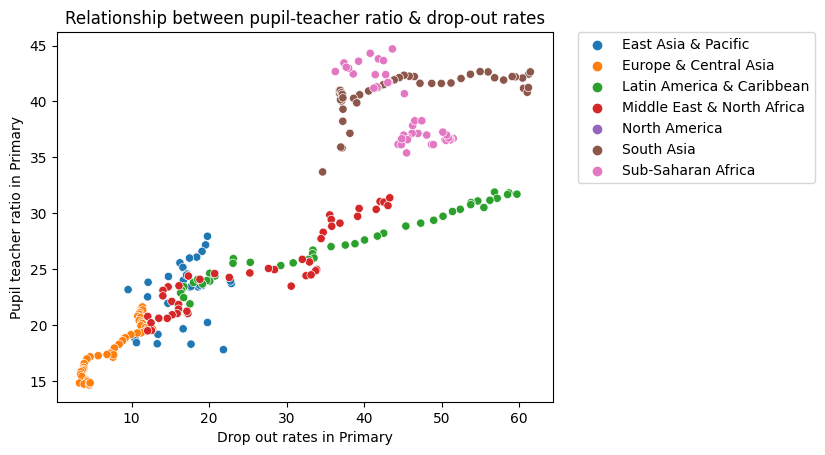

In [356]:
ax = sns.scatterplot(data=df_unmelt,x='Prim-drop-out-rate', y='Prim-Pupil-tr-ratio',hue='country_name')
ax.set(xlabel='Drop out rates in Primary', ylabel='Pupil teacher ratio in Primary')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Relationship between pupil-teacher ratio & drop-out rates")

### Regions with high pupil teacher ratios have higher drop-out rates which could be attributed to the potential drop in quality of education students receive when individual student attention becomes a challenge 


In [ ]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'pre_prim_gross_enrol_ratio'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='Enrolment as %')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pre-primary gross enrolment ratio across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

## Round 2 

In [225]:
df_data_regions_metrics.columns 

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030'],
      dtype='object')

In [227]:
year_numbers = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030']

In [230]:
df_data_regions_metrics_melted = pd.melt(df_data_regions_metrics, id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],value_vars=year_numbers)

In [231]:
df_data_regions_metrics_melted.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'variable', 'value'],
      dtype='object')

In [232]:
dict_desc = {'SE.PRE.ENRR' : 'pre_prim_gross_enrol_ratio', 
'SE.PRM.ENRR': 'prim_gross_enrol_ratio', 
'SE.PRM.NENR' : 'prim_net_enrol_ratio', 
'UIS.XGDP.0.FSGOV' : 'pre_prim_gov_exp', 
'UIS.XGDP.1.FSGOV' : 'prim_gov_exp', 
'UIS.XGDP.23.FSGOV' : 'sec_gov_exp', 
'UIS.XGDP.56.FSGOV' : 'tert_gov_exp', 
'SE.PRE.ENRL.TC.ZS': 'pre_prim_pupil_tr_ratio', 
'SE.PRM.ENRL.TC.ZS': 'prim_pupil_tr_ratio', 
'SE.SEC.ENRL.TC.ZS':'sec_pupil_tr_ratio', 
'SE.PRM.REPT.ZS':'prim_repeaters_percent', 
'SE.PRM.PRSL.ZS':'prim_persistence_percent', 
'SE.ADT.1524.LT.ZS':'15_24_youth_lit', 
'SE.ADT.LITR.ZS':'15_plus_youth_lit', 
'SE.ADT.1524.LT.FM.ZS':'15_24_youth_lit_GPI', 
'NY.GDP.MKTP.CD':'GDP_CD', 
'NY.GDP.PCAP.CD':'GDP_per_capita_CD',
'NY.GNP.MKTP.CD':'GNI_CD',
'SP.POP.GROW':'population_growth',
}
    

In [234]:
df_data_regions_metrics_melted['indicator_desc'] = df_data_regions_metrics_melted['Indicator Code'].apply(lambda x:dict_desc[x])

In [235]:
df_data_regions_metrics_melted['indicator_desc'].value_counts(dropna=False)

15_plus_youth_lit             357
prim_net_enrol_ratio          357
15_24_youth_lit               357
prim_persistence_percent      357
sec_pupil_tr_ratio            357
prim_pupil_tr_ratio           357
pre_prim_pupil_tr_ratio       357
population_growth             357
prim_repeaters_percent        357
prim_gross_enrol_ratio        357
GDP_CD                        357
pre_prim_gross_enrol_ratio    357
tert_gov_exp                  357
sec_gov_exp                   357
prim_gov_exp                  357
pre_prim_gov_exp              357
GNI_CD                        357
GDP_per_capita_CD             357
15_24_youth_lit_GPI           357
Name: indicator_desc, dtype: int64

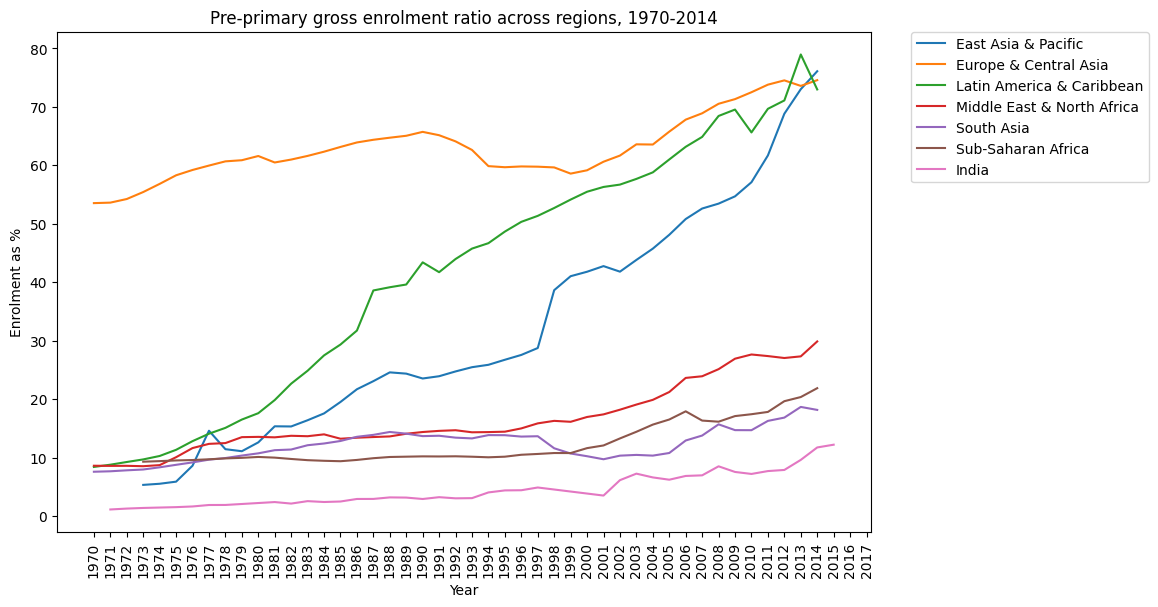

In [355]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'pre_prim_gross_enrol_ratio'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='Enrolment as %')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pre-primary gross enrolment ratio across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

### Pre-primary enrollment levels have shown little improvement in South Asian countries in the past 3 decades
### Latin American & East Asian countries have made the highest progress in early childhood education 


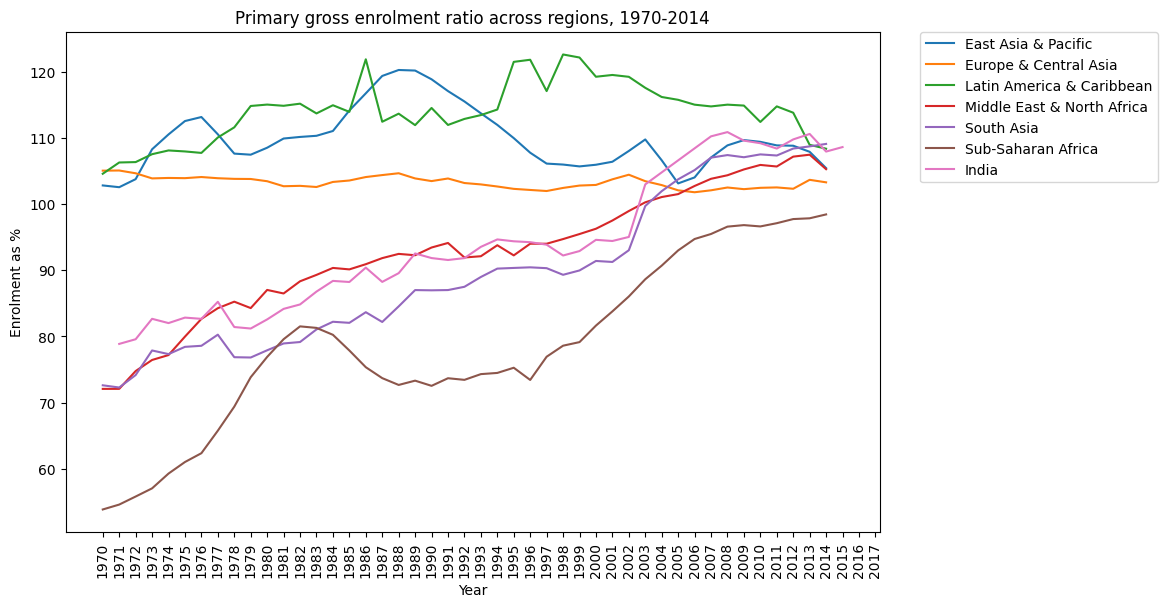

In [353]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'prim_gross_enrol_ratio'],x='variable',y='value',hue='Country Name')
ax.set(xlabel='Year', ylabel='Enrolment as %')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Primary gross enrolment ratio across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

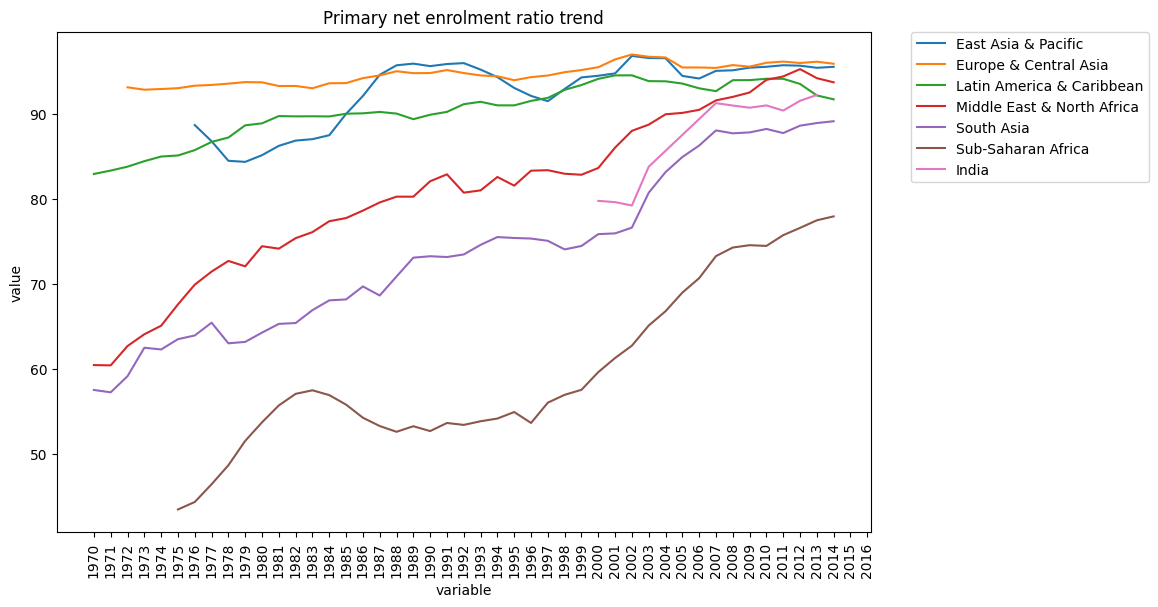

In [259]:
sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'prim_net_enrol_ratio'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Primary net enrolment ratio trend")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

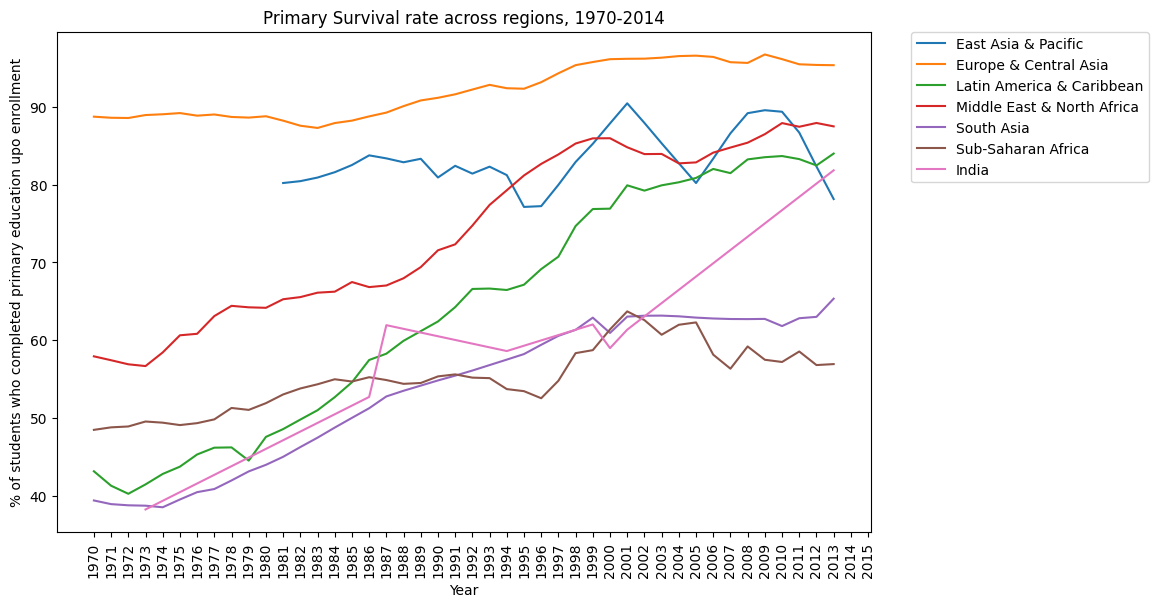

In [354]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'prim_persistence_percent'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='% of students who completed primary education upo enrollment')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Primary Survival rate across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

### Although South Asia & India boast ~ 90% enrolment in the 2000s, the completion levels hover around 55-60% indicating high levels of drop out amidst primary school going children. 
### Starting off a nearly 100% enrolment rate, Latin American & Caribbean countries have made steady progress in improving survival rates in primary education


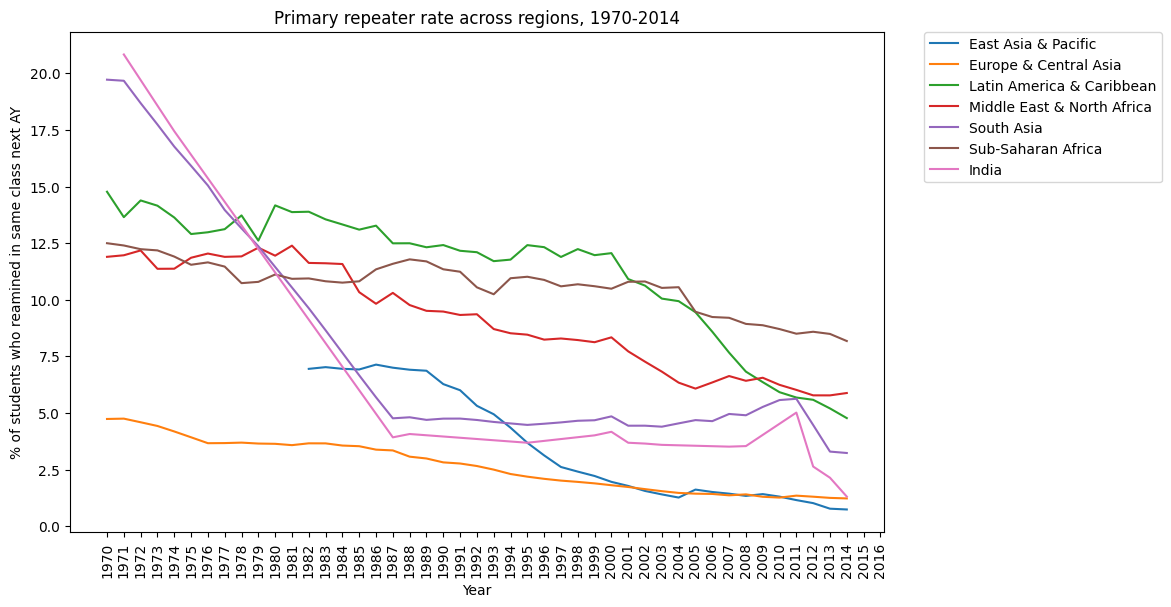

In [358]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'prim_repeaters_percent'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='% of students who reamined in same class next AY')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Primary repeater rate across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

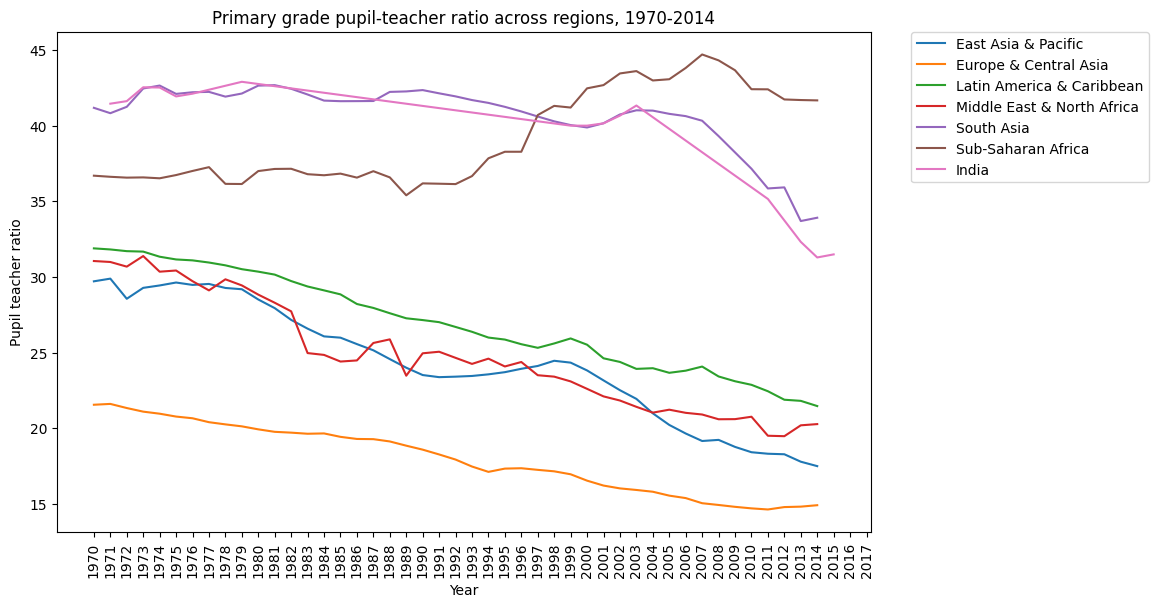

In [360]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'prim_pupil_tr_ratio'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='Pupil teacher ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Primary grade pupil-teacher ratio across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

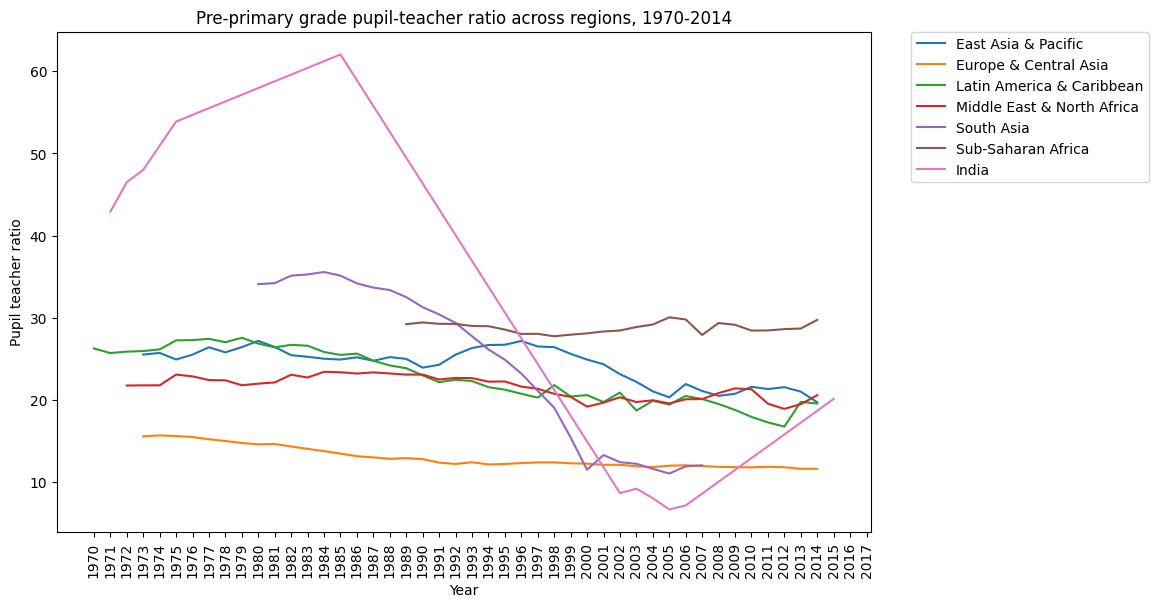

In [362]:
ax = sns.lineplot(data=df_data_regions_metrics_melted[df_data_regions_metrics_melted['indicator_desc'] == 'pre_prim_pupil_tr_ratio'],x='variable',y='value',hue='Country Name')
plt.xticks(rotation=90)
ax.set(xlabel='Year', ylabel='Pupil teacher ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pre-primary grade pupil-teacher ratio across regions, 1970-2014")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [261]:
df_data_regions_metrics_melted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value,indicator_desc
0,East Asia & Pacific,EAS,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,1970,NaN,15_plus_youth_lit
1,East Asia & Pacific,EAS,GDP at market prices (current US$),NY.GDP.MKTP.CD,1970,4.074823e+11,GDP_CD
2,East Asia & Pacific,EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,1970,3.162257e+02,GDP_per_capita_CD
3,East Asia & Pacific,EAS,GNI (current US$),NY.GNP.MKTP.CD,1970,4.033822e+11,GNI_CD
4,East Asia & Pacific,EAS,Government expenditure on pre-primary educatio...,UIS.XGDP.0.FSGOV,1970,NaN,pre_prim_gov_exp


In [ ]:
df_data_regions_metrics_melted.to_csv("")

In [271]:
df_data_reg = df_data_regions_metrics_melted.pivot(index=['Country Code','Country Name','variable'],columns='indicator_desc',values='value').reset_index(drop=False)

In [275]:
df_data_reg.head()

indicator_desc,Country Code,Country Name,variable,15_24_youth_lit,15_24_youth_lit_GPI,15_plus_youth_lit,GDP_CD,GDP_per_capita_CD,GNI_CD,population_growth,...,pre_prim_pupil_tr_ratio,prim_gov_exp,prim_gross_enrol_ratio,prim_net_enrol_ratio,prim_persistence_percent,prim_pupil_tr_ratio,prim_repeaters_percent,sec_gov_exp,sec_pupil_tr_ratio,tert_gov_exp
0,EAS,East Asia & Pacific,1970,NaN,NaN,NaN,4.074823e+11,316.225712,4.033822e+11,2.596915,...,NaN,NaN,102.804962,NaN,NaN,29.712049,NaN,NaN,20.265060,NaN
1,EAS,East Asia & Pacific,1971,NaN,NaN,NaN,4.521554e+11,341.976701,4.483834e+11,2.607611,...,NaN,NaN,102.538544,NaN,NaN,29.889179,NaN,NaN,21.076191,NaN
2,EAS,East Asia & Pacific,1972,NaN,NaN,NaN,5.611249e+11,414.419302,5.570114e+11,2.406704,...,NaN,NaN,103.755592,NaN,NaN,28.558670,NaN,NaN,21.643829,NaN
3,EAS,East Asia & Pacific,1973,NaN,NaN,NaN,7.396770e+11,534.343604,7.342022e+11,2.235552,...,25.508051,NaN,108.267220,NaN,NaN,29.279730,NaN,NaN,20.853649,NaN
4,EAS,East Asia & Pacific,1974,NaN,NaN,NaN,8.521546e+11,602.491430,8.429136e+11,2.175313,...,25.704281,NaN,110.511650,NaN,NaN,29.438480,NaN,NaN,20.249470,NaN


In [272]:
df_data_reg.columns

Index(['Country Code', 'Country Name', 'variable', '15_24_youth_lit',
       '15_24_youth_lit_GPI', '15_plus_youth_lit', 'GDP_CD',
       'GDP_per_capita_CD', 'GNI_CD', 'population_growth', 'pre_prim_gov_exp',
       'pre_prim_gross_enrol_ratio', 'pre_prim_pupil_tr_ratio', 'prim_gov_exp',
       'prim_gross_enrol_ratio', 'prim_net_enrol_ratio',
       'prim_persistence_percent', 'prim_pupil_tr_ratio',
       'prim_repeaters_percent', 'sec_gov_exp', 'sec_pupil_tr_ratio',
       'tert_gov_exp'],
      dtype='object', name='indicator_desc')

In [276]:
df_data_reg.columns = ['country_code', 'country_name', 'year', '15_24_youth_lit',
       '15_24_youth_lit_GPI', '15_plus_youth_lit', 'GDP_CD',
       'GDP_per_capita_CD', 'GNI_CD', 'population_growth', 'pre_prim_gov_exp',
       'pre_prim_gross_enrol_ratio', 'pre_prim_pupil_tr_ratio', 'prim_gov_exp',
       'prim_gross_enrol_ratio', 'prim_net_enrol_ratio',
       'prim_persistence_percent', 'prim_pupil_tr_ratio',
       'prim_repeaters_percent', 'sec_gov_exp', 'sec_pupil_tr_ratio',
       'tert_gov_exp']

## Regression analysis 

In [290]:
ss = StandardScaler()
pd.DataFrame(ss.fit_transform(df_new), columns=df_new.columns)

,pre_prim_gross_enrol_ratio,prim_gross_enrol_ratio,prim_net_enrol_ratio,pre_prim_pupil_tr_ratio,prim_pupil_tr_ratio,prim_repeaters_percent,GDP_CD,GDP_per_capita_CD,population_growth,GNI_CD,prim_persistence_percent
0,-1.000882,-1.189924,-1.121657,0.765239,-1.855450,1.598084,-0.762928,-0.566851,1.657355,-0.761368,-1.024853
1,-0.985817,-1.270598,-1.185364,1.119568,-1.587343,1.245213,-0.761888,-0.604705,1.474774,-0.764182,-0.747539
2,-0.990667,-1.152200,-1.078948,0.843008,-1.594826,1.135191,-0.741097,-0.601429,1.343131,-0.743256,-0.662476
3,-0.981992,-1.177391,-1.104217,0.822732,-1.603562,0.436496,-0.752640,-0.663028,1.167589,-0.754815,-0.799602
4,-1.002938,-1.088231,-1.056010,0.411471,-1.423418,0.126289,-0.782978,-0.758147,0.855779,-0.783559,-0.820753
5,-1.031743,-1.069753,-1.020316,0.362384,-1.022562,0.844134,-0.800189,-0.824295,0.398718,-0.800699,-1.282747
6,-1.001480,-0.989013,-0.934447,-0.320125,-0.875528,0.910474,-0.701031,-0.676010,-0.164184,-0.695344,-1.370389
7,-0.905823,-1.178921,-1.078471,-1.189007,-0.875263,0.769284,-0.675998,-0.667165,-0.699748,-0.669345,-1.668943
8,-0.865692,-0.817584,-0.810965,-1.176595,-0.049388,0.481453,-0.649294,-0.656525,-1.119160,-0.638905,-0.931133
9,-0.819615,-0.645976,-0.707403,-1.664303,0.157360,0.573654,-0.694100,-0.767167,-1.366029,-0.685367,0.233834


In [364]:
country_codes = df_data_reg['country_code'].unique()
feature_cols = ['pre_prim_gross_enrol_ratio',
        'prim_gross_enrol_ratio', 'prim_net_enrol_ratio', 'pre_prim_pupil_tr_ratio',
        'prim_pupil_tr_ratio', 'prim_repeaters_percent', 
        'GDP_per_capita_CD', 'population_growth']
master_lr_dict = {}
for cc in country_codes:
    df = df_data_reg[df_data_reg['country_code'] == cc]
    df_new = df[feature_cols+['prim_persistence_percent']].dropna()
    if df_new.shape[0] > 1:
        ss = StandardScaler()
        df_new = pd.DataFrame(ss.fit_transform(df_new), columns=df_new.columns)
        lr = LinearRegression()
        lr.fit(df_new[feature_cols], df_new['prim_persistence_percent'])
        master_lr_dict[cc] = lr
    else:
        print(f"{cc} code has no df")
    

IND code has no df


Text(0.5, 1.0, 'East Asia & Pacific')

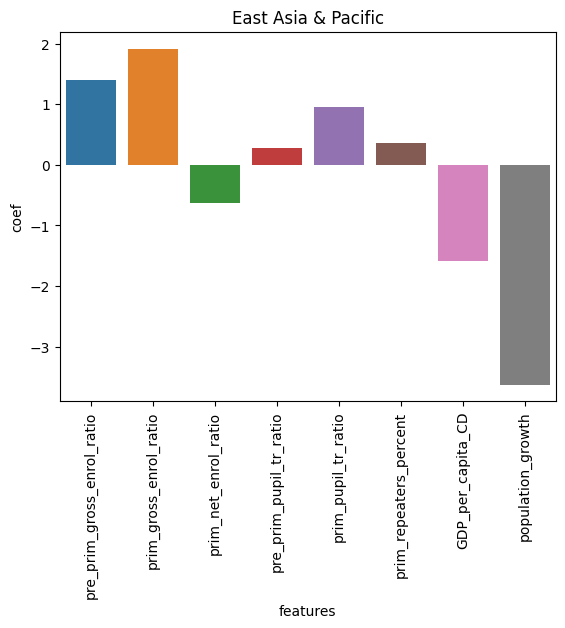

In [331]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict['EAS'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("East Asia & Pacific")

Text(0.5, 1.0, 'Europe & Central Asia')

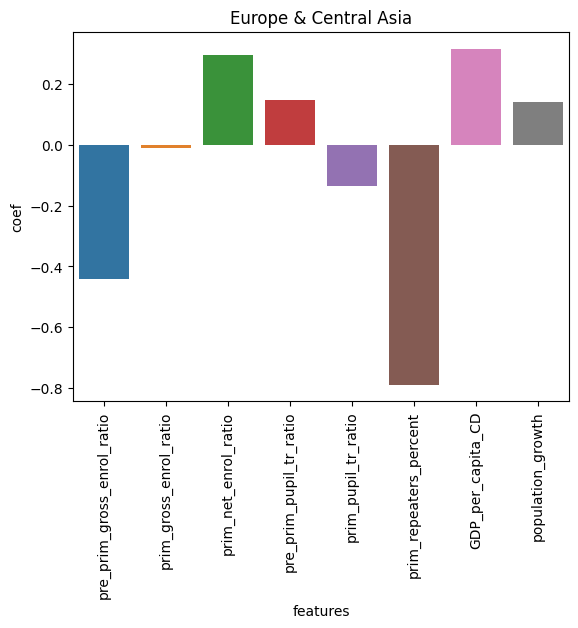

In [332]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict['ECS'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Europe & Central Asia")

Text(0.5, 1.0, 'Latin America & Caribbean')

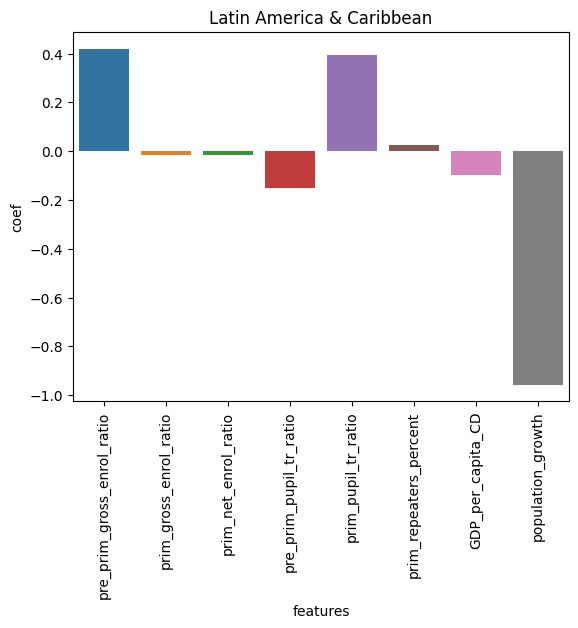

In [333]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict['LCN'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Latin America & Caribbean")

Text(0.5, 1.0, 'Middle East & North Africa')

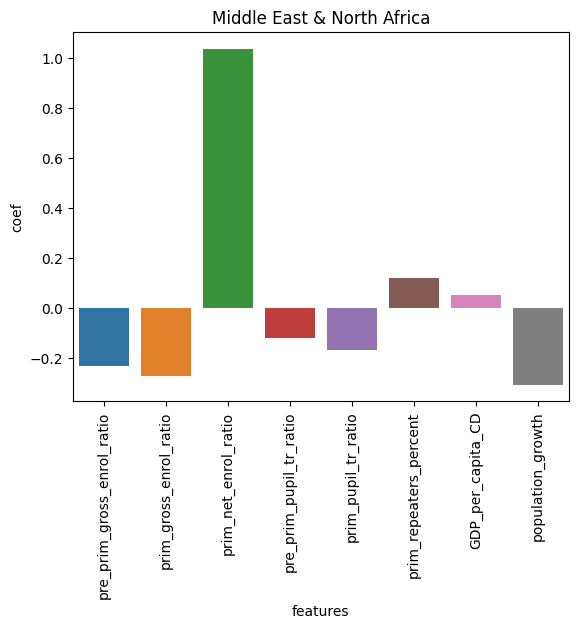

In [334]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict['MEA'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Middle East & North Africa")

Text(0.5, 1.0, 'South Asia')

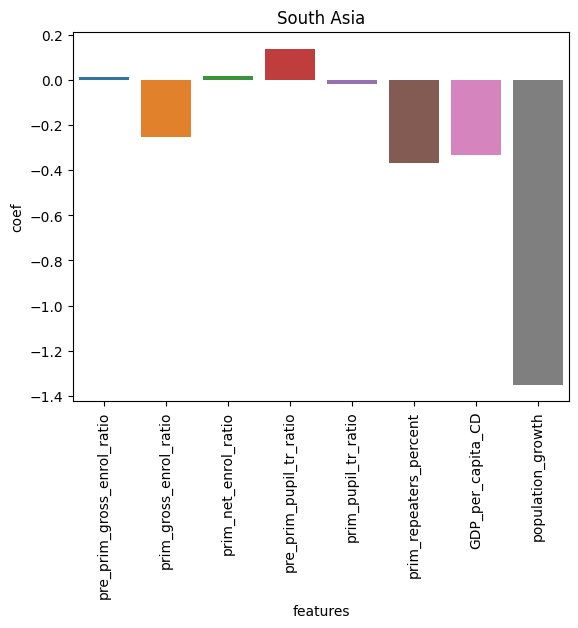

In [335]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict['SAS'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("South Asia")

Text(0.5, 1.0, 'Sub-Saharan Africa')

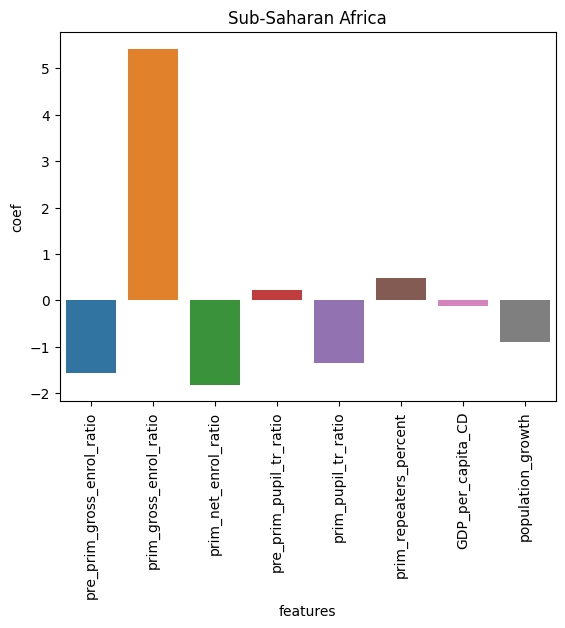

In [336]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict['SSF'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Sub-Saharan Africa")

In [337]:
#country_codes = df_data_reg['country_code'].unique()
feature_cols = [
        'prim_gross_enrol_ratio', 
       'GDP_per_capita_CD',  'prim_repeaters_percent',   'prim_pupil_tr_ratio',
         'population_growth','prim_gov_exp']
master_lr_dict_ind = {}
#for cc in country_codes:
df = df_data_reg[df_data_reg['country_code'] == 'IND']
df_ind = df[feature_cols+['prim_persistence_percent']].dropna()
if df_ind.shape[0] > 1:
    ss = StandardScaler()
    df_ind = pd.DataFrame(ss.fit_transform(df_ind), columns=df_ind.columns)
    lr = LinearRegression()
    lr.fit(df_ind[feature_cols], df_ind['prim_persistence_percent'])
    master_lr_dict_ind['IND'] = lr
else:
    print("code has no df")
    
    #'pre_prim_pupil_tr_ratio',
    
    
      # 'GDP_per_capita_CD', 'GNI_CD', 'population_growth', 'pre_prim_gov_exp',
       #'pre_prim_gross_enrol_ratio', 'pre_prim_pupil_tr_ratio', 'prim_gov_exp',
       #'prim_gross_enrol_ratio', 'prim_net_enrol_ratio',
       #'prim_persistence_percent', 'prim_pupil_tr_ratio',
       #'prim_repeaters_percent', 'sec_gov_exp', 'sec_pupil_tr_ratio',
       #'tert_gov_exp'

Text(0.5, 1.0, 'India')

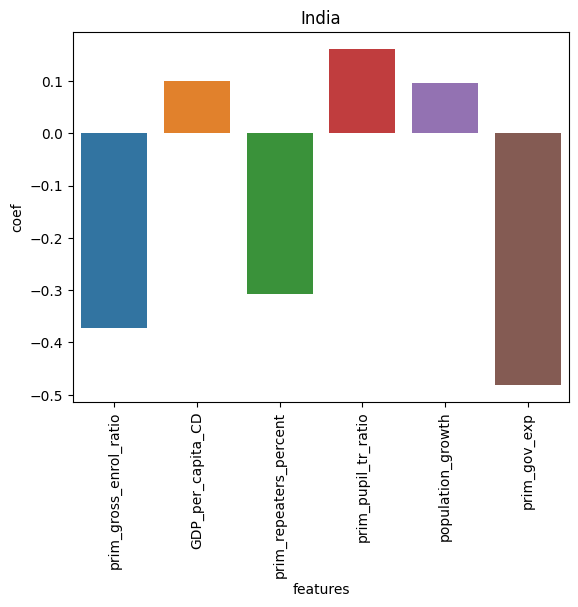

In [338]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_ind['IND'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("India")

In [324]:
master_lr_dict

{}

In [339]:
#country_codes = df_data_reg['country_code'].unique()
feature_cols = [
        'prim_gross_enrol_ratio', 
       'GDP_per_capita_CD',  'prim_repeaters_percent',   'prim_pupil_tr_ratio',
         'population_growth','prim_gov_exp']
master_lr_dict_sas = {}
#for cc in country_codes:
df = df_data_reg[df_data_reg['country_code'] == 'SAS']
df_ind = df[feature_cols+['prim_persistence_percent']].dropna()
if df_ind.shape[0] > 1:
    ss = StandardScaler()
    df_ind = pd.DataFrame(ss.fit_transform(df_ind), columns=df_ind.columns)
    lr = LinearRegression()
    lr.fit(df_ind[feature_cols], df_ind['prim_persistence_percent'])
    master_lr_dict_sas['IND'] = lr
else:
    print("code has no df")
    
    #'pre_prim_pupil_tr_ratio',
    
    
      # 'GDP_per_capita_CD', 'GNI_CD', 'population_growth', 'pre_prim_gov_exp',
       #'pre_prim_gross_enrol_ratio', 'pre_prim_pupil_tr_ratio', 'prim_gov_exp',
       #'prim_gross_enrol_ratio', 'prim_net_enrol_ratio',
       #'prim_persistence_percent', 'prim_pupil_tr_ratio',
       #'prim_repeaters_percent', 'sec_gov_exp', 'sec_pupil_tr_ratio',
       #'tert_gov_exp'

code has no df


In [342]:
df_data_reg.columns

Index(['country_code', 'country_name', 'year', '15_24_youth_lit',
       '15_24_youth_lit_GPI', '15_plus_youth_lit', 'GDP_CD',
       'GDP_per_capita_CD', 'GNI_CD', 'population_growth', 'pre_prim_gov_exp',
       'pre_prim_gross_enrol_ratio', 'pre_prim_pupil_tr_ratio', 'prim_gov_exp',
       'prim_gross_enrol_ratio', 'prim_net_enrol_ratio',
       'prim_persistence_percent', 'prim_pupil_tr_ratio',
       'prim_repeaters_percent', 'sec_gov_exp', 'sec_pupil_tr_ratio',
       'tert_gov_exp'],
      dtype='object')

Text(0.5, 1.0, 'Relationship between pupil-teacher ratio and survival rates in Primary')

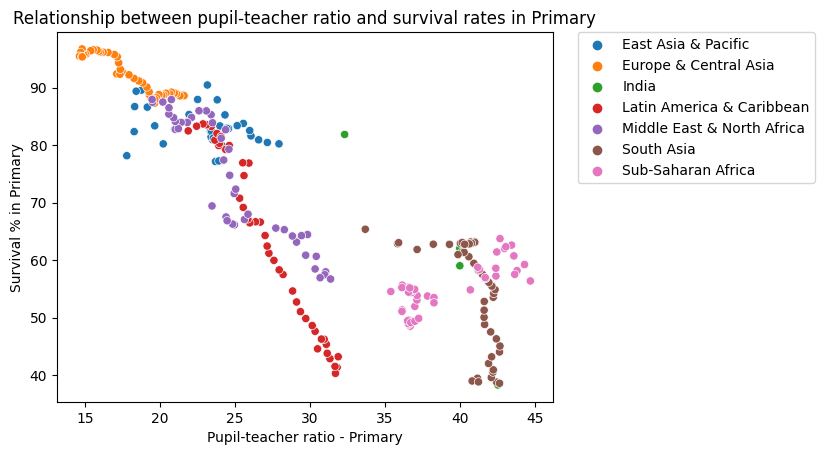

In [357]:
ax = sns.scatterplot(data=df_data_reg,x='prim_pupil_tr_ratio', y='prim_persistence_percent',hue='country_name')
ax.set(xlabel='Pupil-teacher ratio - Primary', ylabel='Survival % in Primary')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Relationship between pupil-teacher ratio and survival rates in Primary")

## Regression analysis round 2

In [367]:
country_codes = df_data_reg['country_code'].unique()
feature_cols = ['pre_prim_gross_enrol_ratio',
        'prim_gross_enrol_ratio', 'pre_prim_pupil_tr_ratio',
        'prim_pupil_tr_ratio', 'prim_repeaters_percent', 
        'GDP_per_capita_CD', 'population_growth']
master_lr_dict_1 = {}
for cc in country_codes:
    df = df_data_reg[df_data_reg['country_code'] == cc]
    df_new = df[feature_cols+['prim_persistence_percent']].dropna()
    if df_new.shape[0] > 1:
        ss = StandardScaler()
        df_new = pd.DataFrame(ss.fit_transform(df_new), columns=df_new.columns)
        lr2 = LinearRegression()
        lr2.fit(df_new[feature_cols], df_new['prim_persistence_percent'])
        master_lr_dict_1[cc] = lr2
    else:
        print(f"{cc} code has no df")
    

IND code has no df


Text(0.5, 1.0, 'East Asia & Pacific')

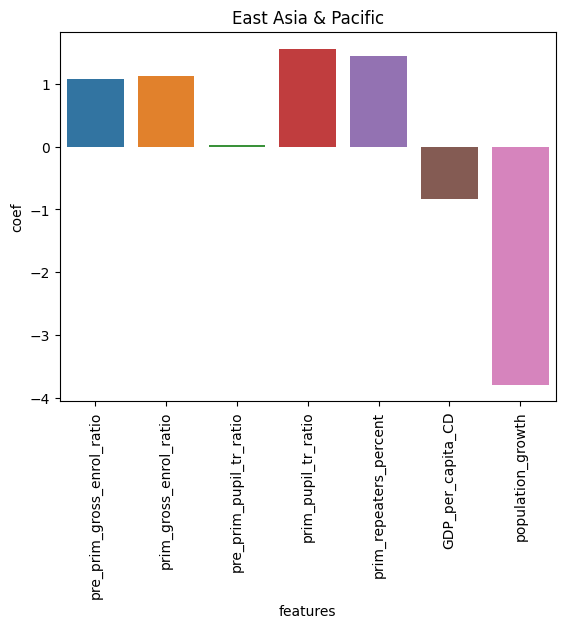

In [368]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_1['EAS'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("East Asia & Pacific")

Text(0.5, 1.0, 'Europe & Central Asia')

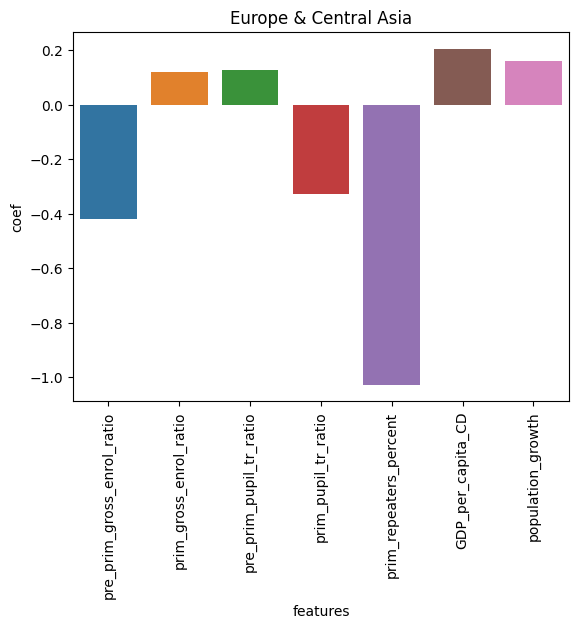

In [370]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_1['ECS'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Europe & Central Asia")

Text(0.5, 1.0, 'Latin America & Caribbean')

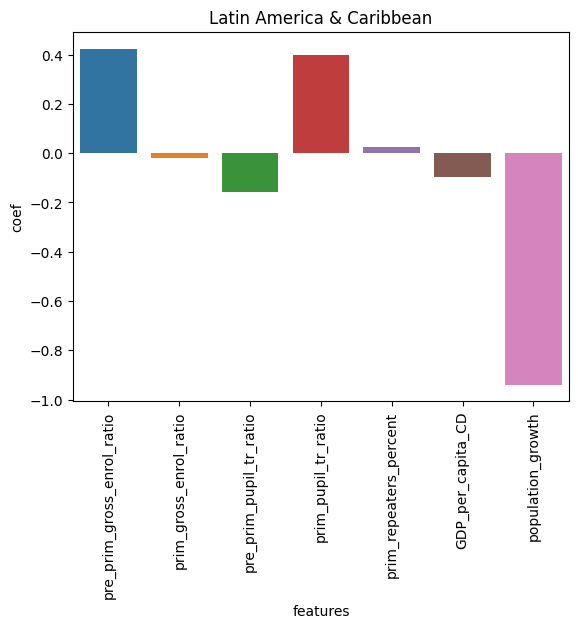

In [371]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_1['LCN'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Latin America & Caribbean")

Text(0.5, 1.0, 'Middle East & North Africa')

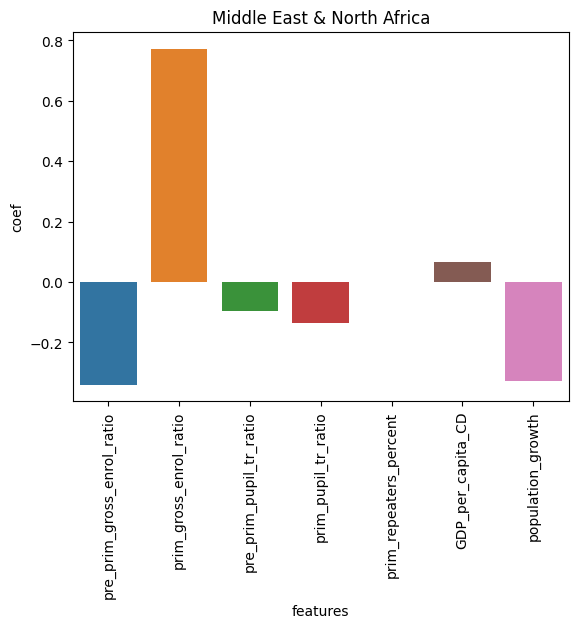

In [372]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_1['MEA'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Middle East & North Africa")

Text(0.5, 1.0, 'South Asia')

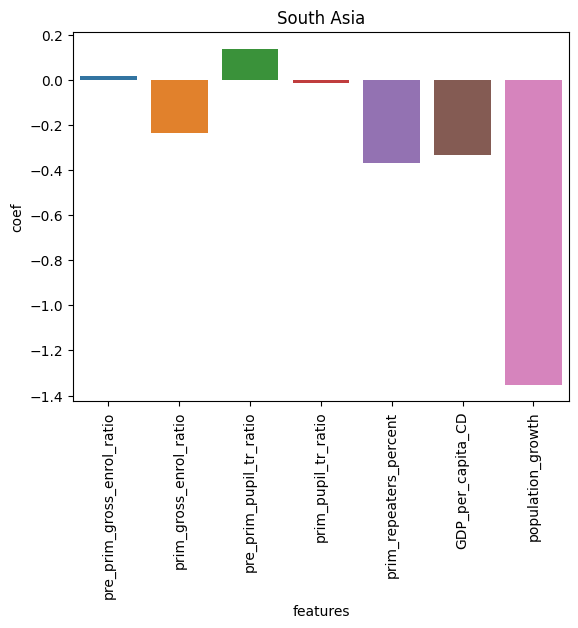

In [373]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_1['SAS'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("South Asia")

Text(0.5, 1.0, 'Sub-Saharan Africa')

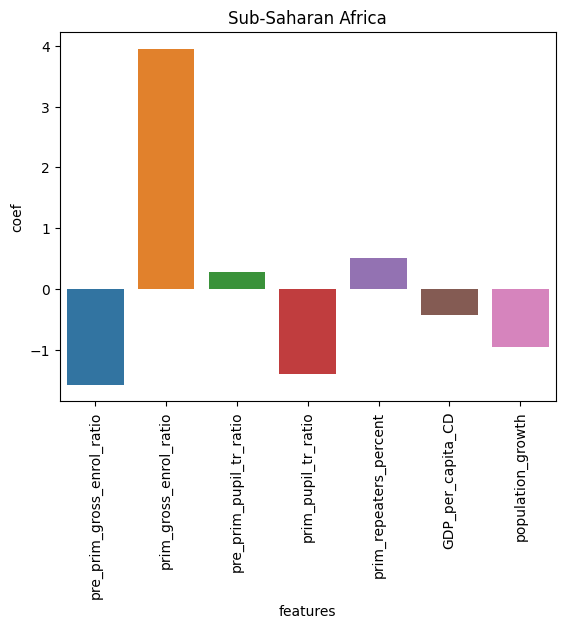

In [374]:
sns.barplot(data=pd.DataFrame({'coef':master_lr_dict_1['SSF'].coef_, 'features':feature_cols}), x='features', y='coef')
plt.xticks(rotation=90)
plt.title("Sub-Saharan Africa")

## NEXT STEPS
### Collect data pertaining to learning outcomes such as reading comprehension, mathematics for the same time period and geographic regions from reports like ASER, PISA to name a few and perform regression analysis with learning outcomes as output variables. 
### Collect reliable data on identified metrics such as expenditure, gender parity indices etc.  to predict future enrolment, dropout and survival rates for each region or country. 
### Analyse how input metrics play a role at each stage in a student life cycle i.e. pre-primary stage, primary stage, secondary stage etc over an extended time period.  For e.g,  pre-primary data from 2000 compared to 2003 primary data and 2009 secondary data.  
